In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('auto_price.csv')
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
data.shape

(205, 26)

In [4]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [6]:
data = data[(data != '?').all(axis=1)]

In [7]:
data.normalized_losses=data.normalized_losses.astype('int64')
data.stroke=data.stroke.astype('float64')
data.bore=data.bore.astype('float64')
data.horsepower=data.horsepower.astype('int64')
data.peak_rpm=data.peak_rpm.astype('int64')
data.price=data.price.astype('int64')

In [8]:
data.shape

(159, 26)

In [9]:
data.skew()

symboling            0.094950
normalized_losses    0.835766
wheel_base           0.914750
length              -0.065976
width                0.916846
height               0.168402
curb_weight          0.782035
engine_size          1.490610
bore                 0.156422
stroke              -0.992743
compression_ratio    2.710242
horsepower           0.916663
peak_rpm             0.148252
city_mpg             0.733666
highway_mpg          0.601052
price                1.591601
dtype: float64

In [10]:
k=pd.DataFrame(data.skew())
k.index

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [11]:
l=[]
for i in k.index:
    l.append(i)

In [12]:
l

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [13]:
for col in l:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])
    elif data.skew().loc[col]<-0.55:
        data[col]=np.power(data[col],3)
        

In [14]:
data.skew()

symboling            0.094950
normalized_losses    0.183731
wheel_base           0.776880
length              -0.065976
width                0.830809
height               0.168402
curb_weight          0.384644
engine_size          0.772729
bore                 0.156422
stroke               0.004505
compression_ratio    2.519518
horsepower           0.340755
peak_rpm             0.148252
city_mpg             0.045151
highway_mpg         -0.031349
price                0.677210
dtype: float64

In [15]:
for col in l:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])
    elif data.skew().loc[col]<-0.55:
        data[col]=np.power(data[col],3)
        

In [16]:
data.skew()

symboling            0.094950
normalized_losses    0.183731
wheel_base           0.761632
length              -0.065976
width                0.820525
height               0.168402
curb_weight          0.384644
engine_size          0.704222
bore                 0.156422
stroke               0.004505
compression_ratio    2.462579
horsepower           0.340755
peak_rpm             0.148252
city_mpg             0.045151
highway_mpg         -0.031349
price                0.635944
dtype: float64

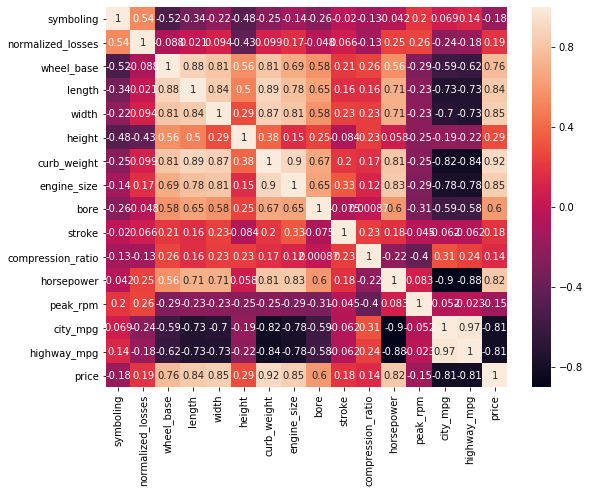

In [17]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)

In [18]:
data=data.drop(['city_mpg','highway_mpg'],axis=1)

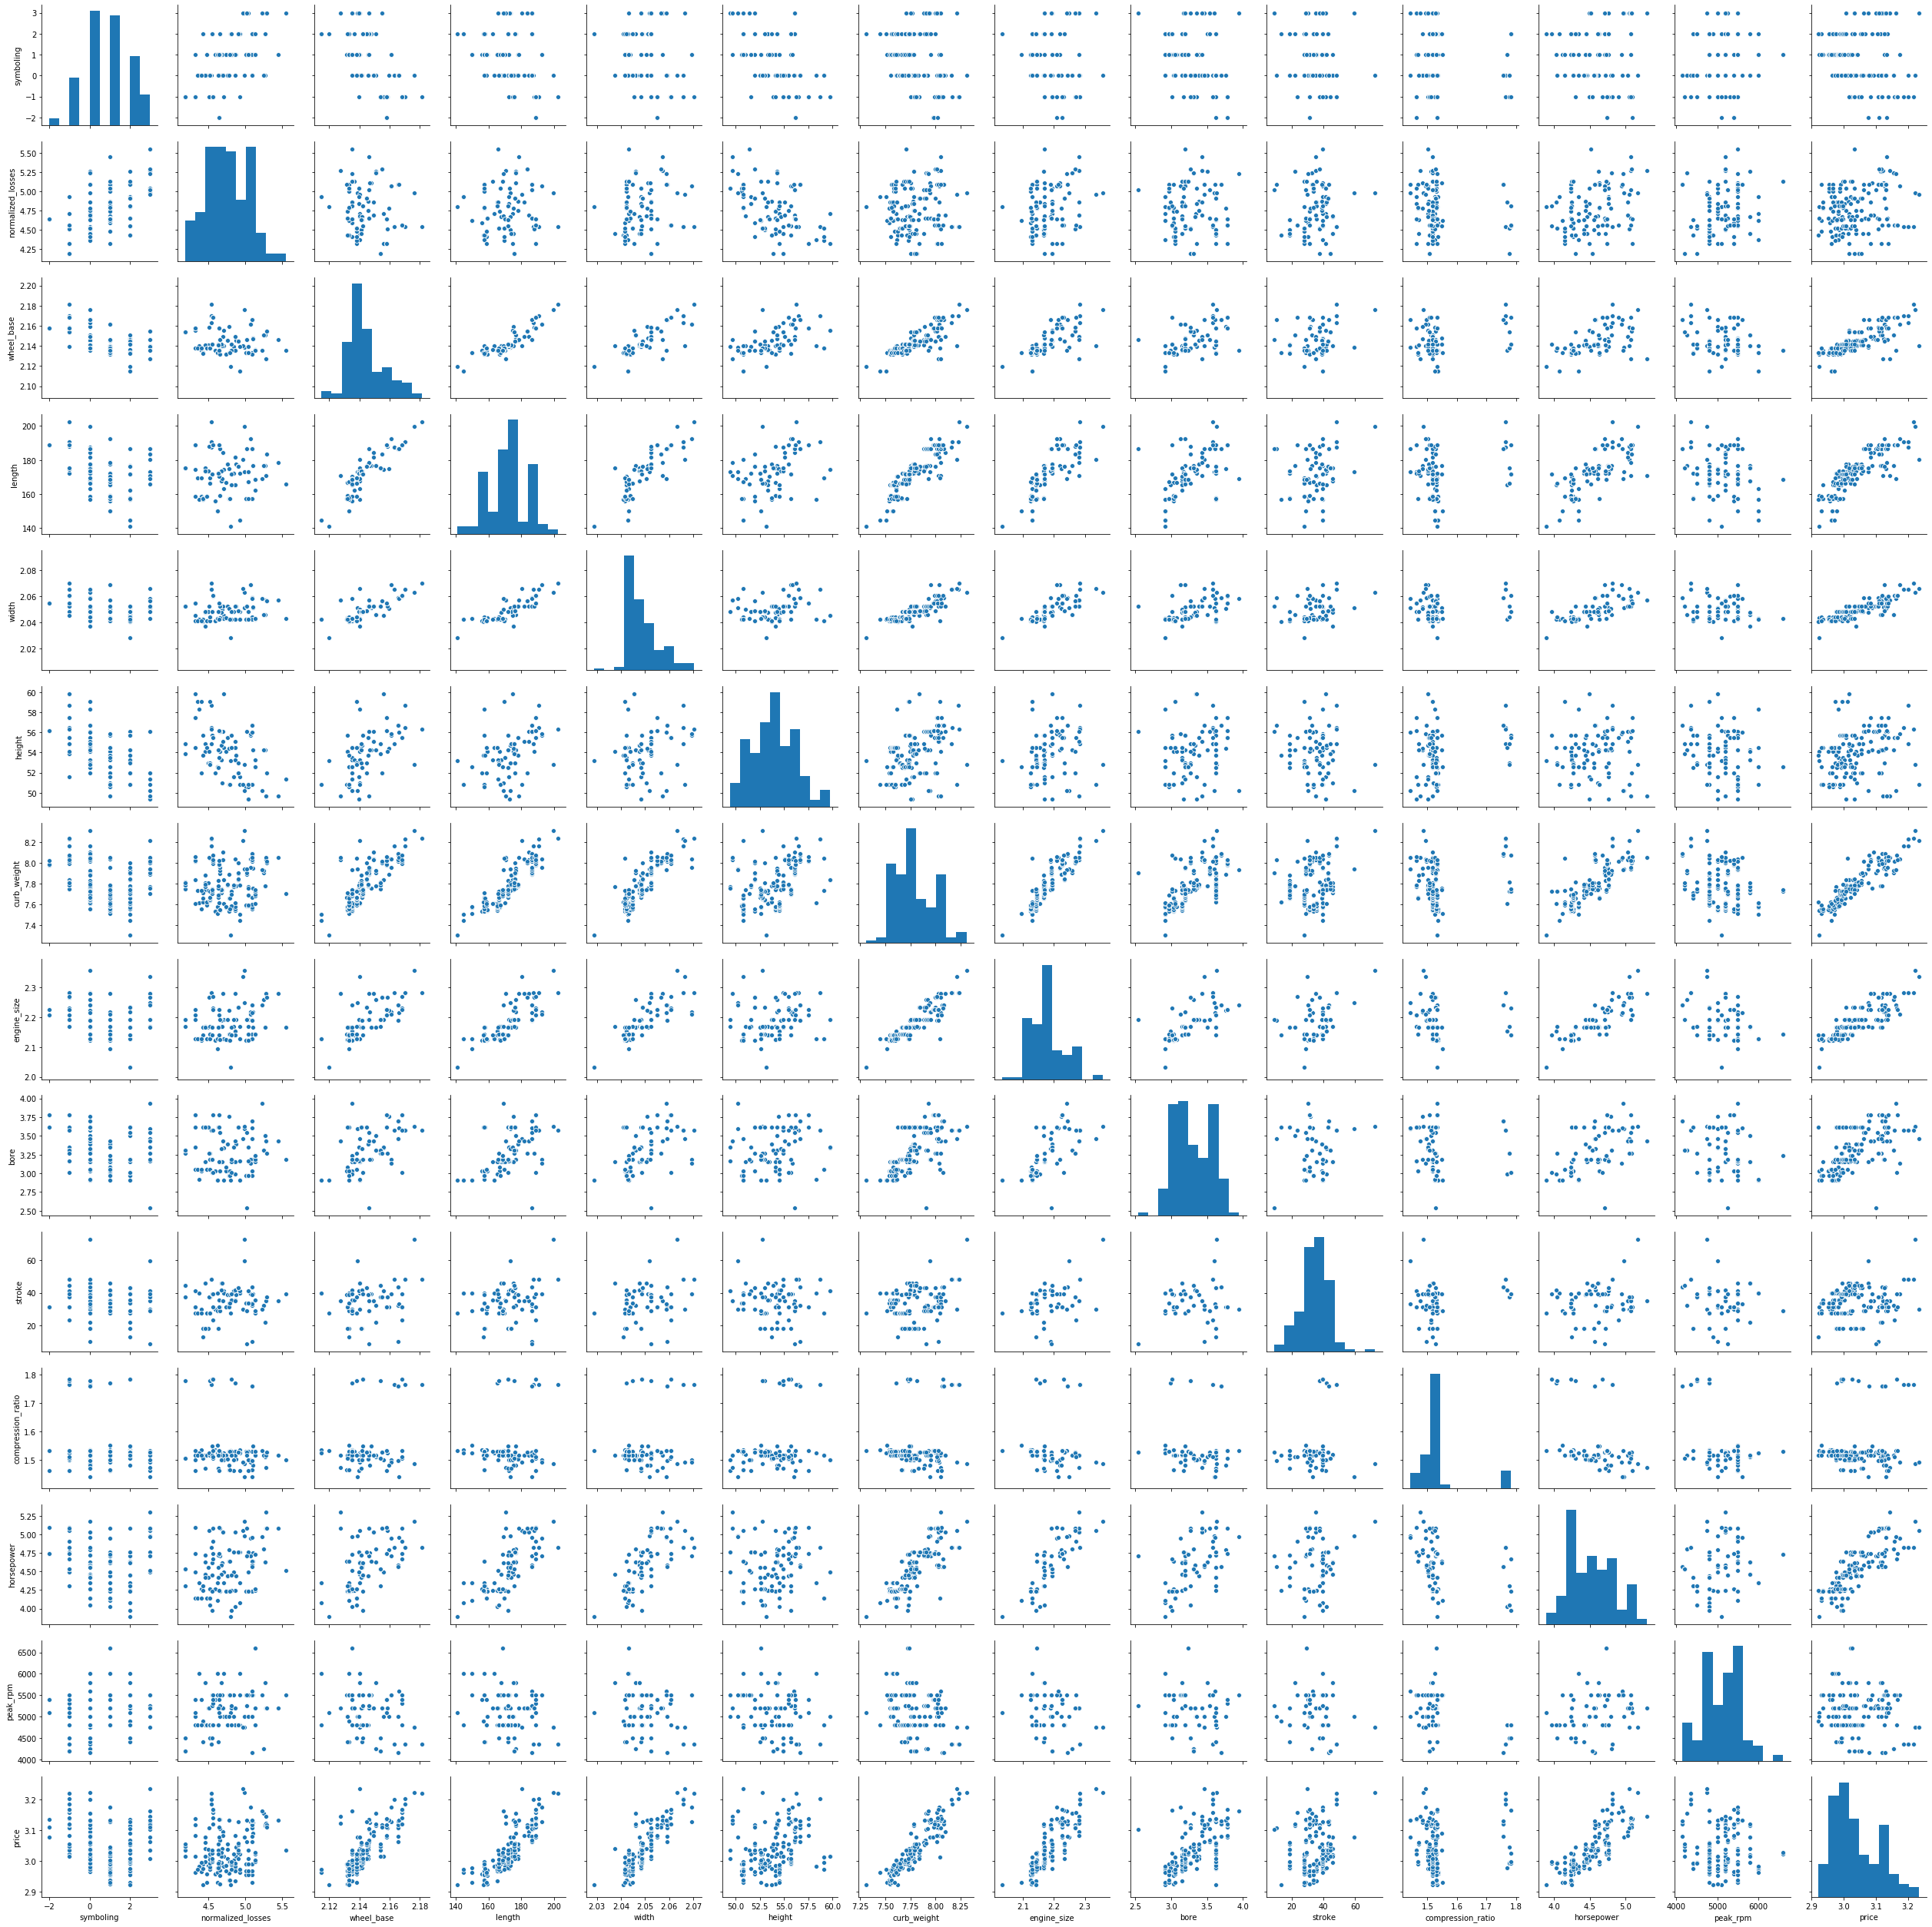

In [19]:
sns.pairplot(data)

In [20]:
data_=pd.get_dummies(data,drop_first=True)

In [21]:
data_.shape

(159, 53)

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data_tr=sc.fit_transform(data_)
data_scaled=pd.DataFrame(data_tr,columns=data_.columns)

In [23]:
data_scaled.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,engine_type_ohcv,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
0,0.8,0.674030,0.494687,0.577236,0.541290,0.471154,0.449035,0.419097,0.464286,0.47821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.8,0.674030,0.480778,0.577236,0.558696,0.471154,0.637344,0.572720,0.464286,0.47821,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.6,0.646782,0.696279,0.839024,0.975994,0.605769,0.644365,0.572720,0.464286,0.47821,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.6,0.646782,0.696279,0.839024,0.975994,0.625000,0.725611,0.546945,0.421429,0.47821,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.8,0.789332,0.542893,0.580488,0.417803,0.471154,0.473423,0.412629,0.685714,0.20556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
data_in=data_scaled.drop('price',axis=1)
data_op=data_scaled.price

In [25]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.15)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))
    if rscore>max_score:
            max_score=rscore
            final_state=i
print('Max_score is :',max_score,'at',final_state)

at random state 0 r2score is:0.9171054875787927
at random state 1 r2score is:0.9129974675487597
at random state 2 r2score is:0.8937025838092851
at random state 3 r2score is:0.9228929574893381
at random state 4 r2score is:0.9238763776595168
at random state 5 r2score is:0.9110760161112832
at random state 6 r2score is:0.903595112286415
at random state 7 r2score is:0.9268914259412001
at random state 8 r2score is:0.9250672595692658
at random state 9 r2score is:0.9317918331667845
at random state 10 r2score is:0.9335806864258581
at random state 11 r2score is:0.9191302476664173
at random state 12 r2score is:0.9158640390095012
at random state 13 r2score is:0.8228939952077687
at random state 14 r2score is:0.9307906564487672
at random state 15 r2score is:0.9088720699108682
at random state 16 r2score is:0.8849847378403048
at random state 17 r2score is:0.9271569097385491
at random state 18 r2score is:0.8140924120751092
at random state 19 r2score is:0.49547810133991566
at random state 20 r2score is:

In [27]:
from sklearn.model_selection import cross_val_score as cvs

In [28]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=27,test_size=0.15)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(lr,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.950904967060033
rscore for training data: 0.9657445479137662
Cross val score: [0.8851332  0.94007838 0.71015056 0.7938283  0.87839113 0.91077289
 0.89310329 0.82868826 0.92544313 0.92468158]
Mean cv: 0.869027071053577


In [29]:
error=mean_squared_error(y_test,y_pred)
error1=mean_squared_error(y_train,train_pred)
print('Mean_squared error for testing data is:',error)
print('Mean_squared error for training data is:',error1)

Mean_squared error for testing data is: 0.002620036871647481
Mean_squared error for training data is: 0.0018142950005029614


In [30]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=40)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [31]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'max_depth':range(2,10)}]
grid_search=GridSearchCV(estimator=RFR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
grid_search.best_params_

{'max_depth': 7, 'random_state': 79}

In [33]:
score=grid_search.best_score_
score

0.8960780526759551

In [34]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=79,max_depth=7)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
train_pred=RFR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(RFR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.92545419455971
rscore for training data: 0.9689466522513474
Cross val score: [0.8783728  0.87557525 0.83975033 0.91280112 0.9107394  0.85328088
 0.85929172 0.85228094 0.92428865 0.90555185]
Mean cv: 0.8811932935007534


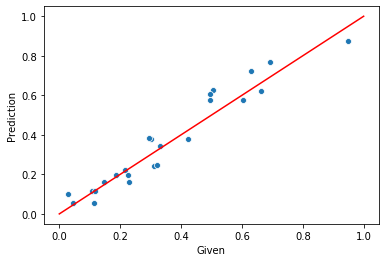

In [35]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,1,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.052391912765974456
Mean absolute error of train data: 0.02688631148932941
Mean squared error of test data: 0.06307344168073156
Mean squared error of train data: 0.040554898009200674


In [37]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR()
ABR.fit(x_train,y_train)
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'loss':['linear', 'square', 'exponential'],'learning_rate':[0.3]}]
kf = KFold(shuffle=True, n_splits=10)
grid_search=GridSearchCV(estimator=ABR,param_grid=parameters,scoring='r2',cv=kf,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'learning_rate': 0.3, 'loss': 'exponential', 'random_state': 33}


0.8751467699672321

In [39]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR(learning_rate=0.3,loss='square',random_state=34)
ABR.fit(x_train,y_train)
y_pred=ABR.predict(x_test)
train_pred=ABR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(ABR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.9300659959680079
rscore for training data: 0.9528178703528793
Cross val score: [0.86052945 0.89132391 0.91821807 0.84390954 0.90931624 0.85315658
 0.89501486 0.94862935 0.91503363 0.87340151]
Mean cv: 0.8908533132210735


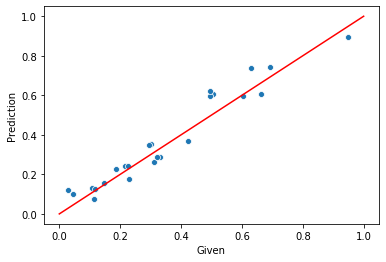

In [40]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,1,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.052298200718130204
Mean absolute error of train data: 0.040036386282943974
Mean squared error of test data: 0.061091265391888104
Mean squared error of train data: 0.049989393765082615


In [42]:
price=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred})
price

,Actual price,Predicted price
86,0.106933,0.131505
49,0.028203,0.119635
116,0.184872,0.227380
154,0.630915,0.737888
136,0.421581,0.366795
132,0.300998,0.354624
150,0.604001,0.597412
65,0.227826,0.177022
78,0.505059,0.608620
88,0.214636,0.242302


In [43]:
price.to_csv('project_14_op.csv')

In [44]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
KNR.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [45]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors':range(3,20),'weights':['uniform','distance'],'leaf_size':[30,50,80,100]}]
grid_search=GridSearchCV(estimator=KNR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'leaf_size': 80, 'n_neighbors': 7, 'weights': 'distance'}


0.7832967813605463

In [47]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=7,leaf_size=80,weights='distance')
KNR.fit(x_train,y_train)
y_pred=KNR.predict(x_test)
train_pred=KNR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(KNR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.8136579140601381
rscore for training data: 0.9989801958516
Cross val score: [0.85744398 0.76130485 0.73389874 0.80611452 0.8659109  0.77407177
 0.87261794 0.90930985 0.67976591 0.69307451]
Mean cv: 0.7953512967578277


In [48]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
GBR=GBR(alpha=0.1)

In [49]:
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
train_pred=GBR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(GBR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.9001738262712892
rscore for training data: 0.9915529195686884
Cross val score: [0.94173736 0.81709263 0.95477204 0.90207272 0.86501813 0.89072275
 0.89434126 0.90554501 0.92430685 0.92211479]
Mean cv: 0.9017723534854856


In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.06077080356328803
Mean absolute error of train data: 0.015779618457867215
Mean squared error of test data: 0.07298895340593785
Mean squared error of train data: 0.02115156055026398


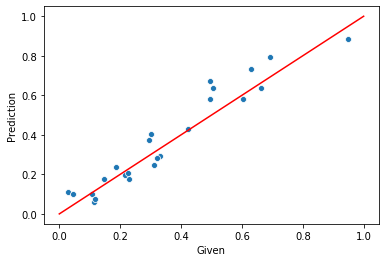

In [51]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,1,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [52]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [53]:
joblib.dump(ABR,'ABR_project14.pkl')

['ABR_project14.pkl']